In [15]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
from neuralnetwork import * # my code
from dnn_class import *
from dnn_regr import *
from regression import * # my code for regression
from misc import *
from sklearn.metrics import mean_squared_error, r2_score

# Regression: Boston Housing
The Boston housing data set was originally a part of UCI Machine Learning Repository
and has been removed now. The data set is now included in **Scikit-Learn**'s 
library.  There are 506 samples and 13 feature (predictor) variables
in this data set. The objective is to predict the value of prices of
the house using the features (predictors) listed here.

The features/predictors are
1. CRIM: Per capita crime rate by town

2. ZN: Proportion of residential land zoned for lots over 25000 square feet

3. INDUS: Proportion of non-retail business acres per town

4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX: Nitric oxide concentration (parts per 10 million)

6. RM: Average number of rooms per dwelling

7. AGE: Proportion of owner-occupied units built prior to 1940

8. DIS: Weighted distances to five Boston employment centers

9. RAD: Index of accessibility to radial highways

10. TAX: Full-value property tax rate per USD10000

11. B: $1000(Bk - 0.63)^2$, where $Bk$ is the proportion of [people of African American descent] by town

12. LSTAT: Percentage of lower status of the population

13. MEDV: Median value of owner-occupied homes in USD 1000s --> **target**

/Users/adelezaini/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


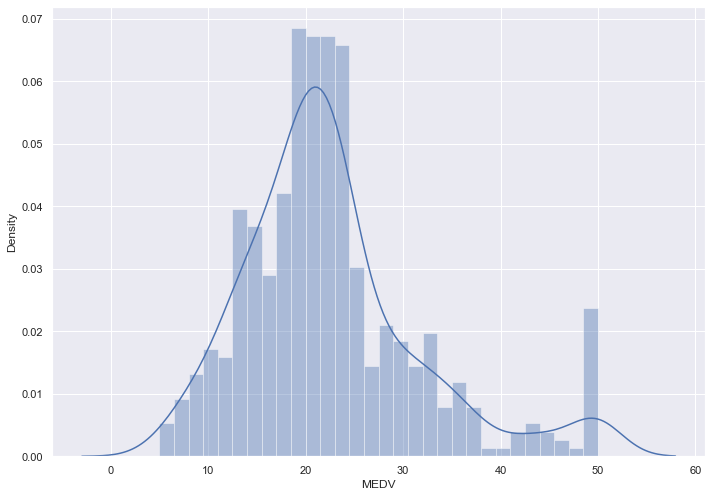

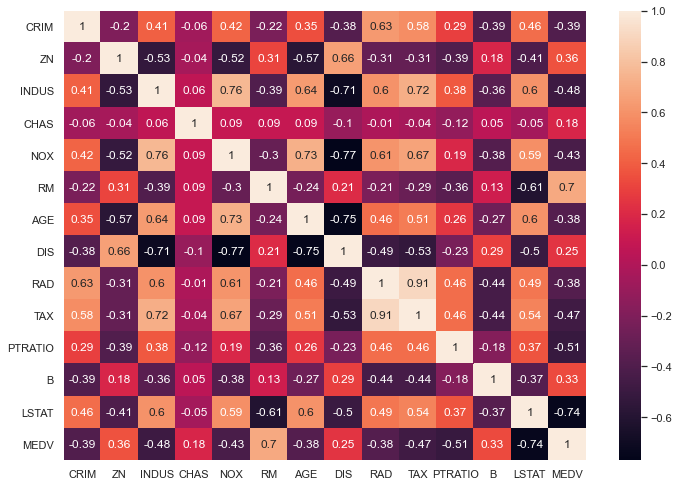

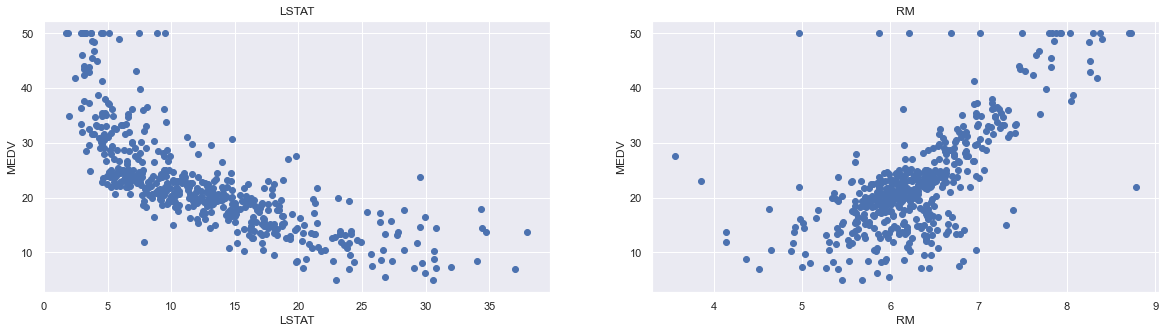

In [2]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.isnull().sum() # check for missing values in all the columns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30) #distribution of the target values
plt.show()
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square
plt.show()
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
plt.show()

X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM']).to_numpy()
Y = boston['MEDV'].to_numpy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

X_train = (X_train-np.mean(X_train,axis=0))/np.std(X_train,axis=0)
X_test = (X_test-np.mean(X_test,axis=0))/np.std(X_test,axis=0)
Y_train = (Y_train-np.mean(Y_train,axis=0))/np.std(Y_train,axis=0)
Y_test = (Y_test-np.mean(Y_test,axis=0))/np.std(Y_test,axis=0)

### Trying my own code

In [3]:
"""print(X.shape[0])
print(X.shape[1])
print(Y_train.shape[0])
#print(Y_train.shape[1])
hidden_layers = [3,2,3]
regrNN = NN_Regression(hidden_layers)
regrNN.fit(X_train.T,Y_train)"""

'print(X.shape[0])\nprint(X.shape[1])\nprint(Y_train.shape[0])\n#print(Y_train.shape[1])\nhidden_layers = [3,2,3]\nregrNN = NN_Regression(hidden_layers)\nregrNN.fit(X_train.T,Y_train)'

## Task b
1. Compare results with code from project 1

### Trying Simone's code

In [4]:
print(X_train.shape)
print(Y_train.shape)

(404, 2)
(404,)


OLS - Linear Regression:
––––––––––––––––––––––––––––––––––––––-
Training loss (MSE): 28.2979
Testing loss (MSE): 39.5247
Testing loss (R2): 0.5567

OLS - Neural Network:
––––––––––––––––––––––––––––––––––––––-
After 10 epochs :    Training Loss = 0.36076190026171384

After 20 epochs :    Training Loss = 0.3471082339771132

After 30 epochs :    Training Loss = 0.3410190839984932

After 40 epochs :    Training Loss = 0.33577232490536574

After 50 epochs :    Training Loss = 0.33074549018346266



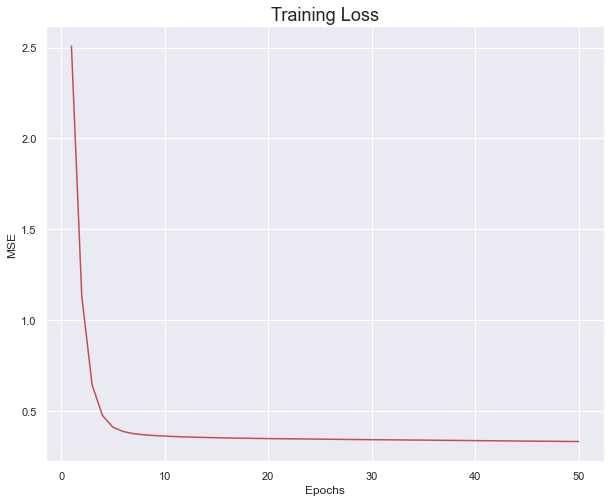


Training Loss :  0.33074549018346266
Testing loss (MSE): 0.6140005938622441
Testing loss (R2): 0.38599940613775585

––––––––––––––––––––––––––––––––––––––-
––––––––––––––––––––––––––––––––––––––-

Ridge - Linear Regression:
––––––––––––––––––––––––––––––––––––––-
Training loss (MSE): 31.9604
Testing loss (MSE): 25.0523
Testing loss (R2): 0.6329

Ridge - Neural Network:
––––––––––––––––––––––––––––––––––––––-
After 10 epochs :    Training Loss = 10.183518429896235

After 20 epochs :    Training Loss = 7.853798626665673

After 30 epochs :    Training Loss = 6.070015835377438

After 40 epochs :    Training Loss = 4.705018134837419

After 50 epochs :    Training Loss = 3.661852607937247

After 60 epochs :    Training Loss = 2.8598211823358244

After 70 epochs :    Training Loss = 2.246091812592173

After 80 epochs :    Training Loss = 1.7779702850025791

After 90 epochs :    Training Loss = 1.4152812834005022

After 100 epochs :    Training Loss = 1.1413386559553447

After 110 epochs :   

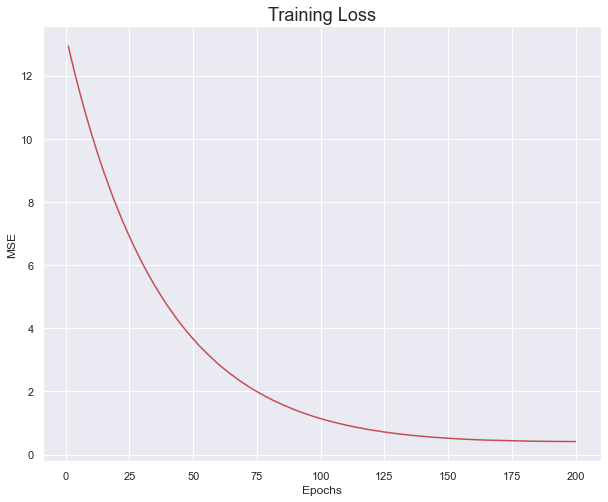


Training Loss :  0.4153706515936057
Testing loss (MSE): 0.6458649250074471
Testing loss (R2): 0.3541350749925529


In [5]:
ols = OLSRegression(X, Y)
ols.split().rescale().fit()

print("OLS - Linear Regression:")
print("––––––––––––––––––––––––––––––––––––––-")
print("Training loss (MSE):", ols.MSE_train())
print("Testing loss (MSE):", ols.MSE_test())
print("Testing loss (R2):", ols.R2_test())
print()
print("OLS - Neural Network:")
print("––––––––––––––––––––––––––––––––––––––-")

modelO = Deep_Neural_Network()
modelO.create(X_train.shape[1],1,[200,50],seed = 4444, output_type='regression', activation='sigmoid')
fig = plt.figure(figsize = (10,8))
modelO.train(X_train.T, Y_train.reshape(1,-1), optimizer='vanilla',regularizer=None,
                    mini_batch_size=32,epochs=50, print_loss_freq=10,
                    learning_rate=0.001)
fig.savefig('Figures/RegrNN_200_50_None_32_50_0.0002.jpg')
Y_nn = modelO.predict(X_test.T)

print("Testing loss (MSE):", mean_squared_error(Y_test, Y_nn.ravel()))
print("Testing loss (R2):", r2_score(Y_test,Y_nn.ravel()))

lmd = 0.1
eta = 0.01

ridge = RidgeRegression(X, Y, lmd = lmd)
ridge.split().rescale().fit()

print()
print("––––––––––––––––––––––––––––––––––––––-")
print("––––––––––––––––––––––––––––––––––––––-")
print()
print("Ridge - Linear Regression:")
print("––––––––––––––––––––––––––––––––––––––-")
print("Training loss (MSE):", ridge.MSE_train())
print("Testing loss (MSE):", ridge.MSE_test())
print("Testing loss (R2):", ridge.R2_test())
print()
print("Ridge - Neural Network:")
print("––––––––––––––––––––––––––––––––––––––-")

modelR = Deep_Neural_Network()
modelR.create(X_train.shape[1],1,[200,50],seed = 4444, output_type='regression', activation='sigmoid')
fig = plt.figure(figsize = (10,8))
modelR.train(X_train.T, Y_train.reshape(1,-1), optimizer='vanilla',regularizer='l2',
                    regularizer_lambda=lmd, mini_batch_size=32,epochs=200, print_loss_freq=10,
                    learning_rate=eta)
fig.savefig('Figures/RegrNN_200_50_L2_32_50_0.0002.jpg')
Y_nn = modelR.predict(X_test.T)

print("Testing loss (MSE):", mean_squared_error(Y_test, Y_nn.ravel()))
print("Testing loss (R2):", r2_score(Y_test,Y_nn.ravel()))

2. Find optimal lmd and eta

In [17]:
print("LAMBDA VS LEARNING RATE PERFORMANCE")

lambdas = [0,1e-12, 1e-10, 1e-5, 1e-2, 0.1]
etas = [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 0.1]
#etas = np.logspace(-5, 1, 12)
#lambdas = np.logspace(-12, 1, 12)

mse = np.zeros((len(lambdas), len(etas)))
r2 = np.zeros((len(lambdas), len(etas)))

modelR = Deep_Neural_Network()
modelR.create(X_train.shape[1],1,[200,50],seed = 4444, output_type='regression', activation='sigmoid')

for i in range(len(lambdas)):
    for j in range(len(etas)):
        modelR.train(X_train.T, Y_train.reshape(1,-1), optimizer='vanilla',regularizer='l2',
                    regularizer_lambda=lambdas[i], mini_batch_size=32, epochs=200, print_loss_freq=202,
                    learning_rate=etas[j], plot_loss = False)
        Y_nn = modelR.predict(X_test.T)
        
        mse[i][j] = mean_squared_error(Y_test, Y_nn.ravel())
        r2[i][j] = r2_score(Y_test, Y_nn.ravel())

LAMBDA VS LEARNING RATE PERFORMANCE


MSE: Best result given by lambda = 0.01 and learning rate = 0.001


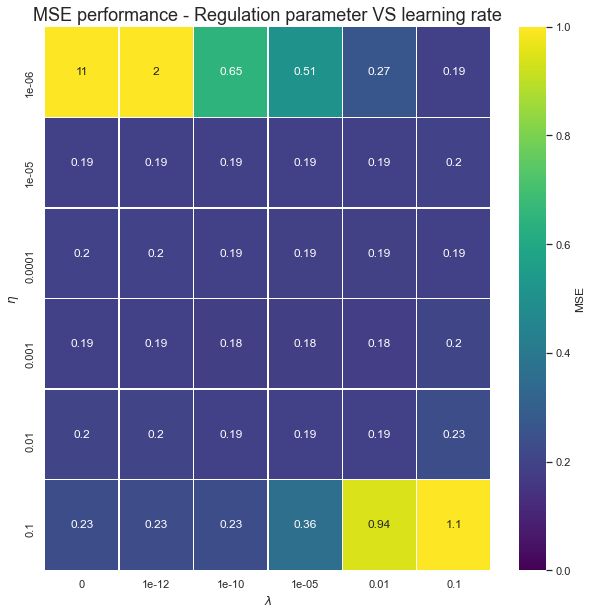

R2: Best result given by lambda = 0.01 and learning rate = 0.001


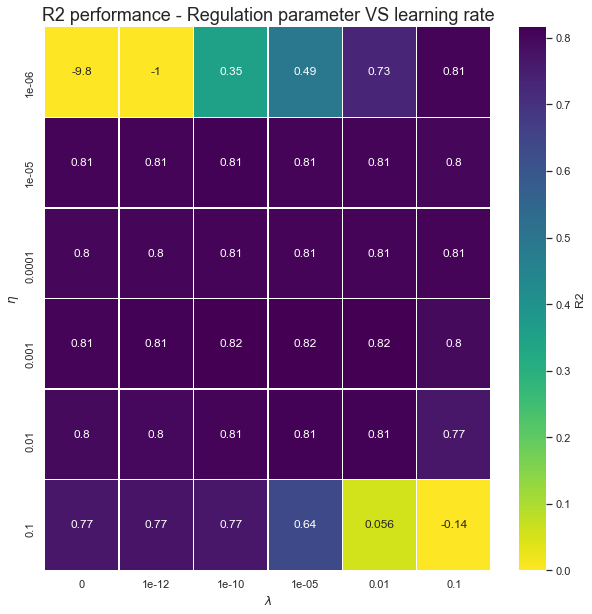

In [13]:
sns.set()

ind= find_min_indexes(mse)
lmd=lambdas[ind[1]]
eta=etas[ind[0]]
print("MSE: Best result given by lambda = "+str(lmd)+" and learning rate = "+str(eta))

#lmbs = ['%s' % float('%.3g' % lmd) for lmd in lambdas]
#ets = ['%s' % float('%.3g' % et) for et in etas]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse, annot=True, ax=ax, cmap="viridis", xticklabels=lambdas, cbar_kws={'label': 'MSE'}, yticklabels=etas, vmin=0, vmax=1, linewidths=.5)
ax.set_title("MSE performance - Regulation parameter VS learning rate", fontsize=18)
ax.set_ylabel(r"$\eta$")
ax.set_xlabel(r"$\lambda$")
fig.savefig('Figures/RegrNN_lmd_eta_MSE.jpg')
plt.show()

ind= find_max_indexes(r2)
lmd=lambdas[ind[1]]
eta=etas[ind[0]]
print("R2: Best result given by lambda = "+str(lmd)+" and learning rate = "+str(eta))

#lmbs = ['%s' % float('%.3g' % lmd) for lmd in lambdas]
#ets = ['%s' % float('%.3g' % et) for et in etas]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(r2, annot=True, ax=ax, cmap="viridis_r", xticklabels=lambdas, cbar_kws={'label': 'R2'}, vmin =0,yticklabels=etas, linewidths=.5)
ax.set_title("R2 performance - Regulation parameter VS learning rate", fontsize=18)
ax.set_ylabel(r"$\eta$")
ax.set_xlabel(r"$\lambda$")
fig.savefig('Figures/RegrNN_lmd_eta_R2.jpg')
plt.show()

## Task c: best activation function

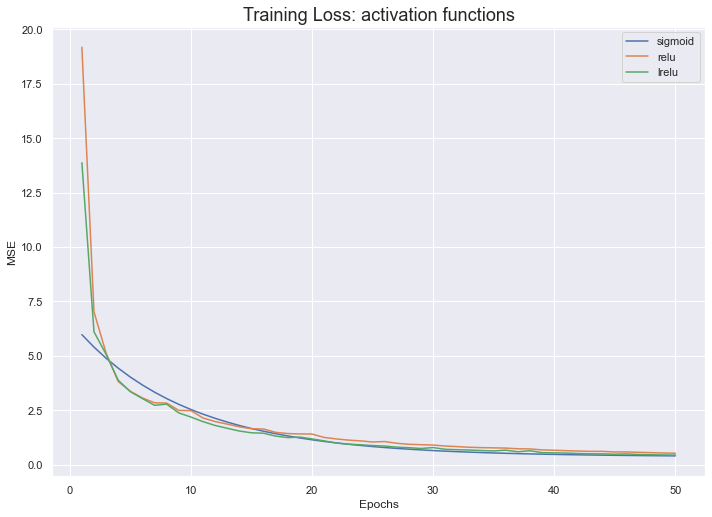

'  \nprint("Testing loss (MSE):", mean_squared_error(Y_test, Y_nn.ravel()))\nprint("Testing loss (R2):", r2_score(Y_test,Y_nn.ravel()))\n'

In [18]:
activations = ['sigmoid', 'relu', 'lrelu']
Y_nn = {}
epochs = 50
r = list(range(1,epochs+1))

fig = plt.figure()
for a in activations:

    modelR = Deep_Neural_Network()
    modelR.create(X_train.shape[1],1,[200,50],seed = 4444, output_type='regression', activation=a)
    train_cost, acc =modelR.train(X_train.T, Y_train.reshape(1,-1), optimizer='vanilla',regularizer=None,
                        mini_batch_size=32,epochs=epochs, print_loss_freq=epochs+1,
                        learning_rate=0.0001, plot_loss = False)
    plt.plot(r,train_cost,label = a)
    Y_nn[a] = modelR.predict(X_test.T)

plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Training Loss: activation functions', fontsize=18)
plt.legend()
plt.show()
fig.savefig('Figures/RegrNN_activations.jpg')
    
"""  
print("Testing loss (MSE):", mean_squared_error(Y_test, Y_nn.ravel()))
print("Testing loss (R2):", r2_score(Y_test,Y_nn.ravel()))
"""